<font size="+3" color=red><b> <u>Module 5:</u></b></font>

<font size="+3"><b> <u>**Projet 2:**  Prédiction de l'apparition du diabète avec **KNN** </u></b></font>

**Objectif:** On utilise la base de données Pima Indians Diabetes pour entraîner les modèles de machine learning.
Cette base de données a été créé par le National Institute of Diabetes and Digestive and Kidney Diseases. L'objectif de l'ensemble de données est de prédire si un patient est diabétique ou non, en se basant sur certaines mesures diagnostiques:
* Pregnancies : Nombre de grossesses (entier)
* Glucose : Niveau de glucose (entier)
* BloodPressure : Pression artérielle (entier)
* SkinThickness : Épaisseur de la peau (entier)
* Insulin : Niveau d'insuline (entier)
* BMI : Indice de masse corporelle (IMC, flottant)
* DiabetesPedigreeFunction : Fonction de pedigree pour le diabète (flottant)
* Age : Âge (entier)
* **Outcome** : Résultat (**1** pour **diabétique**, **0** pour **non-diabétique**)*

# **Import des bibliothèques Python**
Importer une bibliothèque (ou librairie) en Python consiste à charger un module externe dans votre script afin d'utiliser les fonctionnalités, fonctions, classes ou méthodes qu'il offre.

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Lire la base de donnée: PIMA INDIANS DIABETES

**df = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")** :

Cette ligne de code charge les données d'un fichier CSV situé à l'emplacement spécifié et les stocke dans un DataFrame df. Le fichier CSV contient les données de la base de données Pima Indians Diabetes.

**df.head()** :

Cette ligne affiche les 5 premières lignes du DataFrame df. Cela permet d'avoir un aperçu rapide des données, y compris les noms des colonnes et quelques exemples de valeurs.

**df.shape** :

Cette ligne renvoie les dimensions du DataFrame df, c'est-à-dire le nombre de lignes et de colonnes. Le résultat est un tuple sous la forme (nombre_de_lignes, nombre_de_colonnes).

**df.describe().T **:

Cette ligne génère des statistiques descriptives pour chaque colonne numérique du DataFrame df. Le résultat est transposé (grâce à .T), ce qui signifie que les statistiques sont affichées par ligne pour chaque colonne, ce qui facilite la lecture.

**df["Outcome"].value_counts()** :

Cette ligne compte le nombre d'occurrences de chaque valeur unique dans la colonne Outcome du DataFrame df. La colonne Outcome indique si une personne est diabétique (1) ou non (0). Cette opération vous donne une idée de la répartition des classes dans vos données.

In [ ]:
df = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")


In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.describe().T

In [ ]:
df["Outcome"].value_counts()

# Visualiser la relation entre deux variables, par exemple le glucose et l'IMC :

> On utilise la bibliothèque **Matplotlib**          
**Matplotlib** est une bibliothèque de visualisation de données en Python qui permet de créer des graphiques statiques, animés et interactifs.

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Glucose'], df['BMI'], c=df['Outcome'], cmap='coolwarm')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Relation entre Glucose et BMI')
plt.colorbar(label='Outcome')
plt.show()

# Voir la distribution d'une variable par exemple le glucose

In [ ]:
df['Glucose'].hist(bins=30, edgecolor='black', figsize=(10, 6))
plt.title('Distribution du Glucose')
plt.xlabel('Glucose')
plt.ylabel('Nombre')
plt.show()

# **Prétraitement des données**

## Déterminer les valeurs NaN (manquantes) dans le DataFrame

In [ ]:
nan_values = df.isna().sum()
nan_values

## Affichage des colonnes avec des valeurs NaN

In [ ]:
nan_columns = nan_values[nan_values > 0]
nan_columns

## Afficher les lignes avec des valeurs NaN
vous avez bien observé que dans cette base de données, il n'y a pas de valeurs NaN. Cela signifie que toutes les entrées sont complètes et qu'aucune donnée ne manque dans les colonnes du DataFrame.

In [ ]:
df[df.isna().any(axis=1)]

> Crée un nouveau DataFrame X qui contient toutes les colonnes du DataFrame original df, à l'exception de la colonne Outcome.

In [ ]:
X = df.drop("Outcome", axis=1)
X

>  Extrait la colonne Outcome du DataFrame df et la stocke dans la variable y

> * **X** contient les caractéristiques du modèle (toutes les colonnes sauf Outcome).
> * **y** contient la variable cible que le modèle doit prédire (Outcome). 

In [ ]:
y = df["Outcome"]
y

## Normalise les variables indépendantes :

**Note:** Comme nous allons utiliser la méthode KNN, qui est une méthode basée sur la distance, les variables doivent être normalisées. Les résultats obtenus seront plus rapides et plus précis. 

La **normalisation** est une technique de prétraitement des données utilisée pour ajuster les valeurs des caractéristiques (features) dans un jeu de données afin qu'elles se trouvent toutes dans une plage commune. Le but principal de la normalisation est de mettre les caractéristiques sur la même échelle sans déformer les différences dans les plages de valeurs

**MinMaxScaler()** : Cette classe est utilisée pour normaliser les données en les mettant à l'échelle dans une plage spécifique, par défaut entre 0 et 1.

**fit_transform()** : Cette méthode ajuste le MinMaxScaler sur les données et transforme ensuite ces données en les normalisant. Les valeurs sont ainsi mises à l'échelle entre 0 et 1.

**pd.DataFrame(normalized_data, columns=df.columns)** : Après la normalisation, les données sont converties en un DataFrame pour conserver les noms des colonnes d'origine, ce qui facilite l'interprétation des résultats.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialiser le MinMaxScaler
scaler = MinMaxScaler()

# Appliquer la normalisation
# fit_transform applique à la fois l'ajustement et la transformation
Normalized_Data = scaler.fit_transform(X)

# Convertir les données normalisées en DataFrame pour une meilleure lisibilité
X = pd.DataFrame(Normalized_Data, columns=X.columns)


# Afficher les premières lignes des données normalisées
print(X.head())

# **Choix de modèle**


* La méthode .fit(**X**, **y**) est utilisée pour entraîner le modèle KNN sur les données d'entraînement.
> **X** représente les données de caractéristiques, c'est-à-dire les variables explicatives ou indépendantes.      
> **y** représente les étiquettes de classe, c'est-à-dire les valeurs cibles ou dépendantes, que le modèle doit prédire ((une personne est diabétique (**1**) ou non (**0**)).

# **Division des données en ensembles d'entraînement et de test**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
> Diviser les données en un ensemble d'entraînement et un ensemble de test permet de tester la capacité de généralisation d'un modèle, c'est-à-dire de vérifier comment il se comporte sur des données qu'il n'a jamais vues pendant l'entraînement, et ainsi éviter le surapprentissage (overfitting)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **Choix de modèle**
* **KNeighborsClassifier** est utilisée pour créer une instance d'un modèle de classification K-Nearest Neighbors (KNN) en spécifiant le nombre de voisins à considérer lors de la classification.
En spécifiant **n_neighbors=5**, on indique que le modèle doit prendre en compte les **5** **voisins les plus proches** pour faire une prédiction

# **Entraînement de modèle**            
La méthode **fit(X_train, y_train)** est utilisée pour entraîner un modèle de machine learning sur les données d'entraînement

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)

# Prédiction sur l'ensemble de test
La méthode knn_model.predict(X) permet d'utiliser le modèle KNN entrainé pour prédire les classes des patients dans un ensemble de données X_test.       
Le résultat, **y_pred**, est un tableau contenant **les classes prédites** pour chaque patient, que on peut utiliser pour évaluer la performance du modèle ou pour faire des prédictions sur de nouvelles données.

In [ ]:
y_pred = knn_model.predict(X_test)
y_pred

Choisir un patient aléatoirement **(random_user)**

In [ ]:
random_user = X_test.sample(1, random_state=45)
random_user

**Afficher les valeurs initiales de  patient  (random_user) et la classe associée**

In [ ]:
# Trouver l'index de le patient aléatoire dans X_test
random_user_index = random_user.index[0]

# Trouver la valeur correspondante dans y_test
corresponding_y_value = y_test.loc[random_user_index]

# Afficher les valeurs initiales de le patient et la classe associée
print("Valeurs initiales de l'observation choisie :")
print(random_user)
print("\nClasse réelle associée :", corresponding_y_value)


Résulat de prédiction est **array([1])**, cela signifie que le modèle a prédit que la personne est **diabétique**

In [ ]:
knn_model.predict(random_user)

# Calcul des métriques d'évaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Affichage des résultats
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

In [ ]:
# Affichage de la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

**Interprétation des résultats**
Ces résultats fournissent une évaluation complète des performances de KNN. 
* L'accuracy de 0.68 signifie que le modèle a correctement prédit 68 % des cas. Autrement dit, pour chaque 100 prédictions effectuées par le modèle, 68 d'entre elles étaient correctes.
* La précision de 0.54 signifie que parmi toutes les instances que le modèle a prédites comme diabétiques, seulement 54 % étaient effectivement diabétiques. Cela indique que le modèle fait pas mal d'erreurs en identifiant des individus non diabétiques comme diabétiques (faux positifs)
*  Un rappel de 0.49 signifie que le modèle a identifié correctement 49 % des patients qui sont réellement diabétiques. En d'autres termes, il manque 51 % des cas de diabète (faux négatifs)
*  Le F1-score de 0.51 indique un équilibre global modéré entre la précision et le rappel
* Matrice de confusion:
> 118 Vrais Négatifs (TN) : Le modèle a correctement identifié 118 patients non diabétiques.             
> 33 Faux Positifs (FP) : Le modèle a identifié  33 patients comme étant diabétiques alors qu'ils ne le sont pas.       
> 41 Faux Négatifs (FN) : Le modèle a manqué 41 patients qui sont réellement diabétiques.       
> 39 Vrais Positifs (TP) : Le modèle a correctement identifié 39 patients diabétiques.


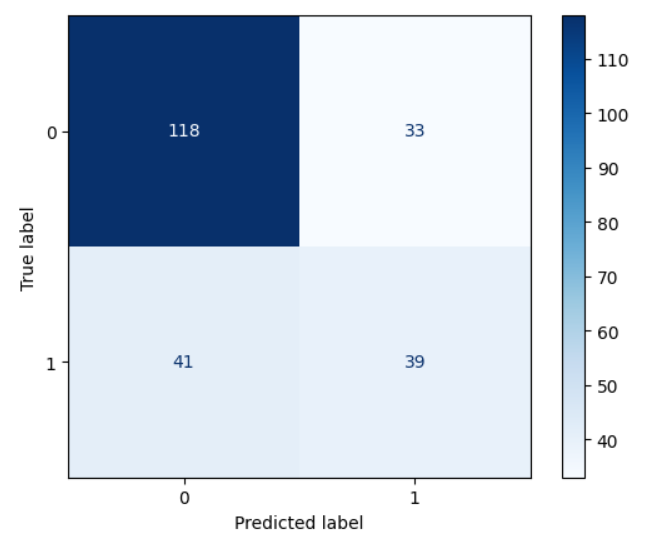